# Imbalance Data:

- Best Example here: Fraud Detection, Intrusion Detection [Use case where one kind of data is too less compare to another kind of data (majority / minority data)]. This kind of data is known as imbalanced data.

- Here, we cannot directly preprocess and train the model with such imbalanced data, So we use various techniques that re-balances the data or make it more accurate...

- Few of the techniques (sampling methods) are as follow:

1. Under Sampling.
2. Over Sampling.
3. Hybrid Techniques and many more...

## 1. Under Sampling:

- This method removes the majority class until the balanced is achieved.
- This may results into loosing some important data from the majority class.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dict_items([(2, 9345), (1, 523), (0, 132)])


<Axes: >

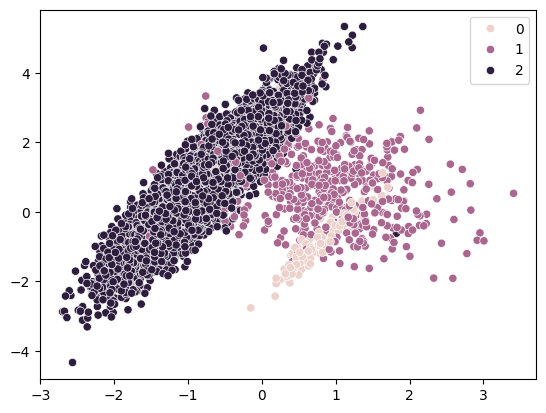

In [53]:
# Generating a sample data that is imbalanced

from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.01, 0.05, 0.94], #imbalance data (1%, 5%, 94%)
    class_sep=0.8, random_state=0
)

print(Counter(y).items())
sns.scatterplot(
    x =X.T[0],
    y = X.T[1],
    hue = y 
)

### 1.1. Random Under Sampling:

- Fast and simple data balancer...

dict_items([(0, 132), (1, 132), (2, 132)])


<Axes: >

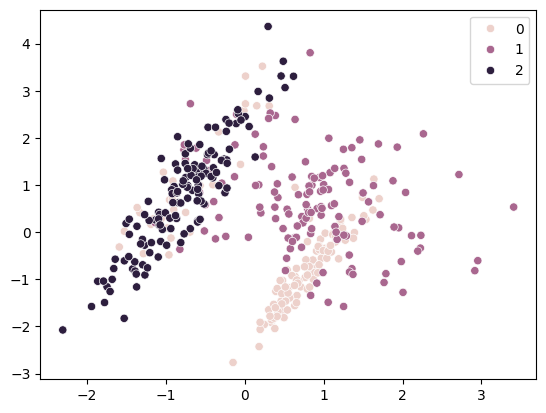

In [37]:
from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rs.fit_resample(X,y)
print(Counter(y_resampled).items())


sns.scatterplot(
    x = X_resampled.T[0],
    y = X_resampled.T[1],
    hue = y_resampled 
)

### 1.2. Cluster Centroid based under sampling:

- Uses K-means based data reduction to balance the data.

dict_items([(0, 132), (1, 132), (2, 132)])


<Axes: >

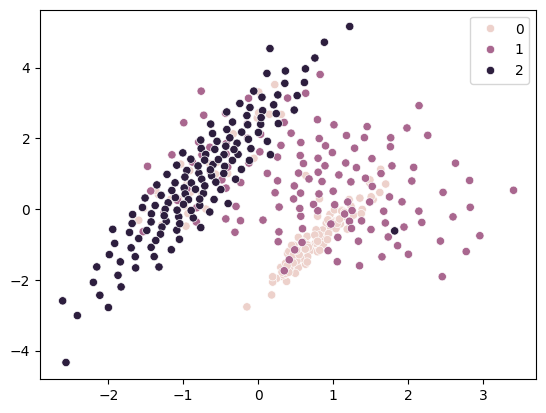

In [38]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X,y)
print(Counter(y_resampled).items())

sns.scatterplot(
    x = X_resampled.T[0],
    y = X_resampled.T[1],
    hue = y_resampled 
)

### 1.3. NearMiss:

- Two parameters: `version=` (3 versions) and `n_neighbors=` (size of neighbourhood - ave. dist. to minority point samples)

dict_items([(0, 132), (1, 118), (2, 109)])


e:\00_SCULPTSOFT\training-internship\github\28MAY2025\venv\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
e:\00_SCULPTSOFT\training-internship\github\28MAY2025\venv\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


<Axes: >

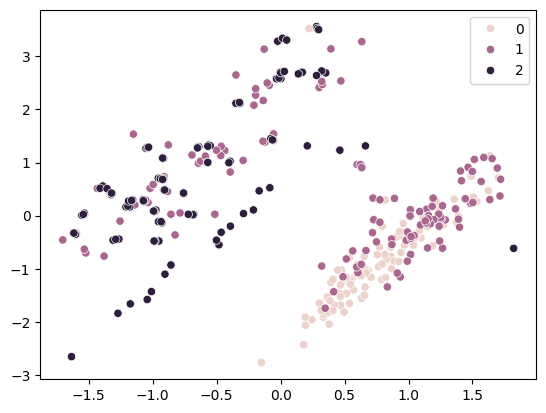

In [49]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3, n_neighbors=3)

X_resampled, y_resampled = nm.fit_resample(X,y)
print(Counter(y_resampled).items())

sns.scatterplot(
    x = X_resampled.T[0],
    y = X_resampled.T[1],
    hue = y_resampled 
)

## 2. Over Sampling:

- This generates the dummy data belonging to the minorty class until the balane is achieved.
- This may lead to overfitting as well...

dict_items([(2, 2800), (1, 156), (0, 44)])


<Axes: >

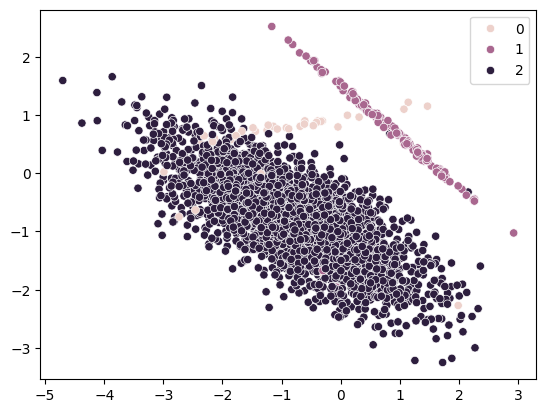

In [107]:
# Generating a sample data that is imbalanced
X, y = make_classification(
    n_samples=3000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.01, 0.05, 0.94], #imbalance data (1%, 5%, 94%)
    class_sep=0.8, random_state=11
)

print(Counter(y).items())
sns.scatterplot(
    x =X.T[0],
    y = X.T[1],
    hue = y 
)

### 2.1 Random Over Sampling:

- Fast and simple data balancer...
- Simply duplicates the minority class examples randomly...

dict_items([(2, 2800), (1, 2800), (0, 2800)])


<Axes: >

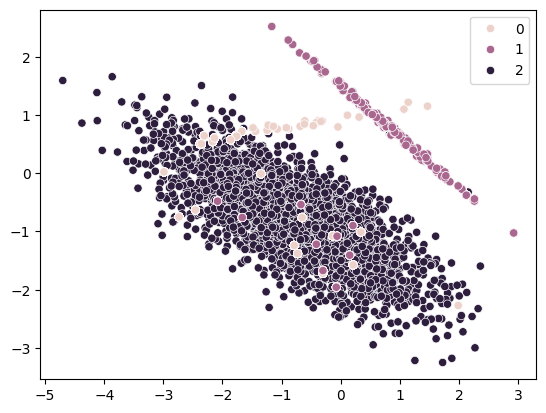

In [108]:
from imblearn.over_sampling import RandomOverSampler

rs = RandomOverSampler(random_state=0)
X_resampled, y_resampled = rs.fit_resample(X,y)
print(Counter(y_resampled).items())

sns.scatterplot(
    x = X_resampled.T[0],
    y = X_resampled.T[1],
    hue = y_resampled,
)

### 2.2 Smoothed Bootstrap oversampling:

- Unlike the above one (2.1) This one uses randomness or noise to generate the data points.

- To set the parameter `shrinkage` in the randomsampler

dict_items([(2, 2800), (1, 2800), (0, 2800)])
dict_items([(2, 2800), (1, 2800), (0, 2800)])


Text(0.5, 1.0, 'shrinkage = 0.2')

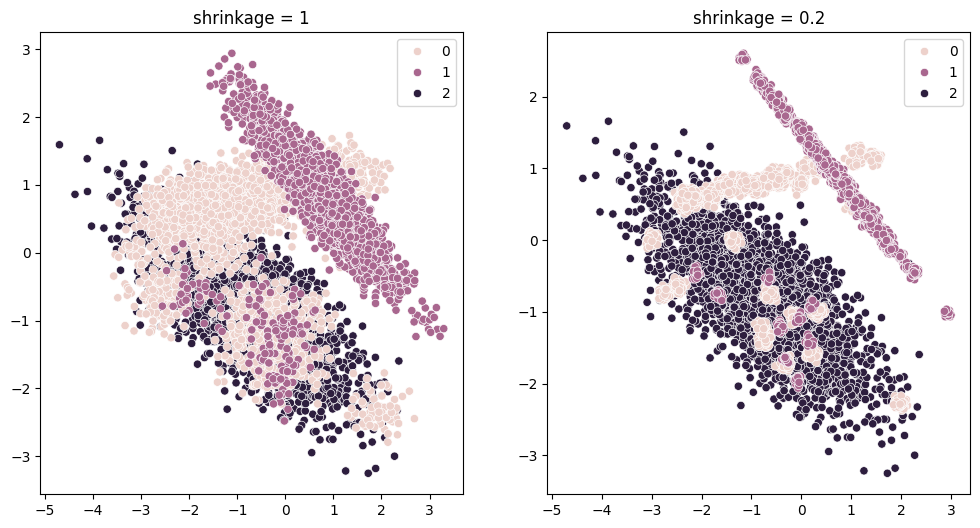

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
rs.set_params(shrinkage = 1)
X_resampled, y_resampled = rs.fit_resample(X,y)
print(Counter(y_resampled).items())

sns.scatterplot(
    ax=axes[0],
    x = X_resampled.T[0],
    y = X_resampled.T[1],
    hue = y_resampled,
)
axes[0].set_title('shrinkage = 1')

rs.set_params(shrinkage = 0.2)
X_resampled, y_resampled = rs.fit_resample(X,y)
print(Counter(y_resampled).items())


sns.scatterplot(
    ax=axes[1],
    x = X_resampled.T[0],
    y = X_resampled.T[1],
    hue = y_resampled,
)
axes[1].set_title('shrinkage = 0.2')

### 2.3 SMOTE [Synthetic Minority Oversampling Technique]:

- Rather than simply duplicating the minorities, it generates the sample data byproper use of neighbors (knn based kinda).

### 2.4 ADASYN (Adaptive Synthetic Sampling):

- This is used generally where it is difficult to generate the samples in the regions of decision boundary.

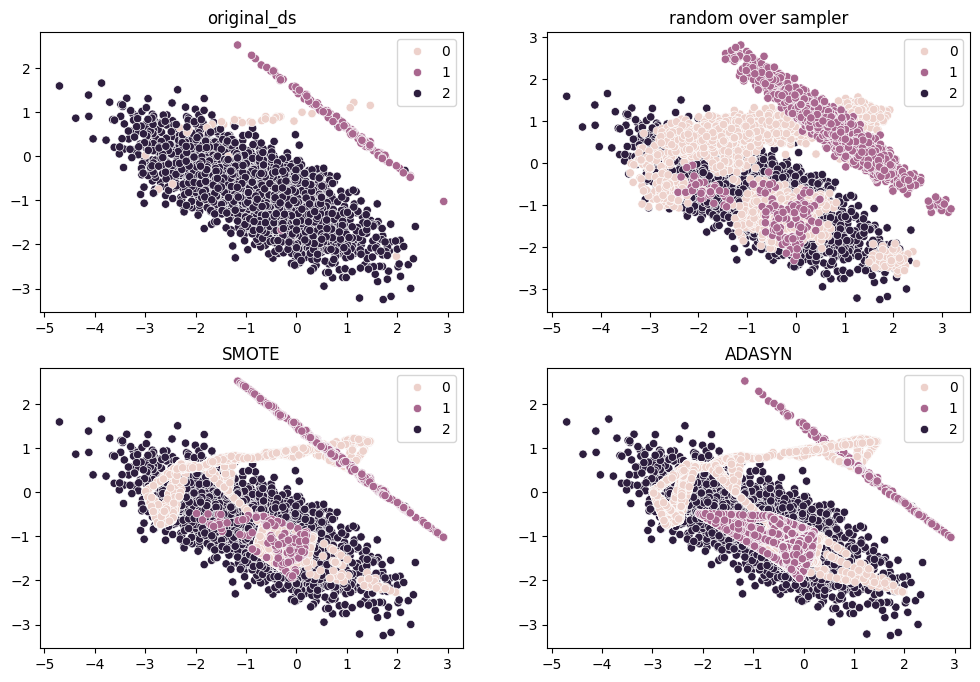

In [117]:
from imblearn import FunctionSampler
from imblearn.over_sampling import SMOTE, ADASYN

fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(12,8)
) 

samplers = [
    None,
    RandomOverSampler(random_state=0).set_params(shrinkage=0.7),
    SMOTE(random_state=0),
    ADASYN(random_state=0)
]
titles = [
    'original_ds', 'random over sampler', 'SMOTE', 'ADASYN'
]

for ax, sampler, title in zip(axes.ravel(), samplers, titles):
    X_resampled, y_resampled = sampler.fit_resample(X,y) if sampler else (X,y)
    sns.scatterplot(
        ax=ax,
        x= X_resampled.T[0],
        y = X_resampled.T[1],
        hue=y_resampled,
    )
    ax.set_title(title)

---

Notes by Kirtan Ghelani @sculptsoft